# Support Vector Machine

This notebook was created as part of a project to predict which members of a not for profit orginizaiton will renew their membership and which will cancel. Much of the code was adapted from a Udemy course Python Data Science and Machine Learning Boot Camp. some of the code including the upsampling and learning curves were taken form the machine learning with python github repo various other resources also provided parts of the code.The code was edited to hide all proprietary information.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
#  import the formatted membership data
data = pd.read_csv("format_variables_output4.csv")
# drop the entries for new members who joined leavig renewals and cancelations only
data = data[data['Target']!=2]

The variables used were chosen in notebook 9 with the Random Forest code.

In [3]:
data1 = data[['Target','TotalPopulation', 'MedianAge', 'MedianIncomeAdjusted', '%NonHispanicWhites',
            '%DrivetoWork','%Bachelors','Pop_Den']]

In [4]:
target = 'Target'
X =  data1.drop(columns=['Target']).values
y = data1['Target'].values

In [5]:
# split for a testing and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [6]:
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [7]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   0  370]
 [   0 3527]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       370
           1       0.91      1.00      0.95      3527

    accuracy                           0.91      3897
   macro avg       0.45      0.50      0.48      3897
weighted avg       0.82      0.91      0.86      3897



C:\Users\brody\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The default model returns all positive predictions.  Not very helpful.

### Grid Search 
tunning the hyperparameters.

In [8]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [9]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.908, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.909, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.7s remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.909, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.909, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.908, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.908, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.909, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.909, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.909, total=   4.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.909, total=   9.1s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.912, total=   8.6s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.909, total=   9.3s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.910, total=   9.4s
[CV] C=10, gamma=0.01, kernel=rbf ....................................
[CV] ........ C=10, gamma=0.01, kernel=rbf, score=0.911, total=  10.7s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.909, total=   9.5s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.912, total=   8.3s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] .

[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.910, total=   9.4s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ..... C=1000, gamma=0.001, kernel=rbf, score=0.911, total=   9.2s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.909, total=   7.8s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.911, total=   7.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.908, total=   6.9s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.908, total=   7.7s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.909, total=   7.3s


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 15.8min finished


{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.9104610241123066


In [10]:
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[  13  357]
 [   1 3526]]
              precision    recall  f1-score   support

           0       0.93      0.04      0.07       370
           1       0.91      1.00      0.95      3527

    accuracy                           0.91      3897
   macro avg       0.92      0.52      0.51      3897
weighted avg       0.91      0.91      0.87      3897



A model with a linera kernel took a long time to run and the results were never reached.  

### Some techniques for an imblanced data set
first one is balanced weight parameter

In [6]:
model= SVC( C = 1, gamma = 0.01, kernel = 'rbf',
            class_weight='balanced', # penalize
            probability=True)
 

model.fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))    

[[  16  354]
 [   1 3526]]
              precision    recall  f1-score   support

           0       0.94      0.04      0.08       370
           1       0.91      1.00      0.95      3527

    accuracy                           0.91      3897
   macro avg       0.92      0.52      0.52      3897
weighted avg       0.91      0.91      0.87      3897



#### Results:
Out of all the models this one is the highest precision for predicting members who will cancel although the recall is still very low. 

### Learning Curvve for the model with a balanced weight parameter

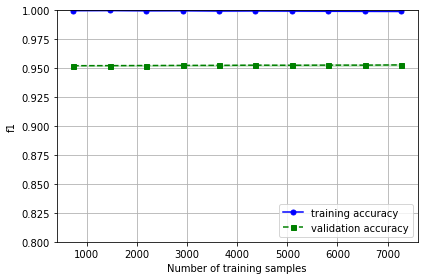

In [18]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C = 1, gamma = 0.01, kernel = 'rbf',
            class_weight='balanced', # penalize
            probability=True), 
                                            X_train,  y_train, cv=5, scoring='f1', n_jobs=-1, 
                                              train_sizes=np.linspace(0.1, 1.0, 10))


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('f1')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()



#### Result:
The two curves don't seem to meet.  Seems like too much variance and overfitting.

### roc curve
for the model with a balanced weight parameter

Best Threshold=0.775816, G-Mean=0.260
Best Threshold with Youden J=0.775816


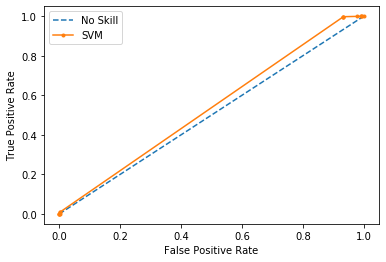

In [11]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
from numpy import sqrt
from numpy import argmax


# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.33, random_state=2, stratify=y)
# fit a model
model = SVC( C = 1, gamma = 0.01, kernel = 'rbf',
            class_weight='balanced', # penalize
            probability=True)
 
model.fit(trainX, trainy)
# predict probabilities
yhat = model.predict_proba(testX)
# keep probabilities for the minority outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(testy, yhat)
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()

It does not seem like the model is able to perform very well.

### precision recall curve

Logistic: f1=0.953 auc=0.943


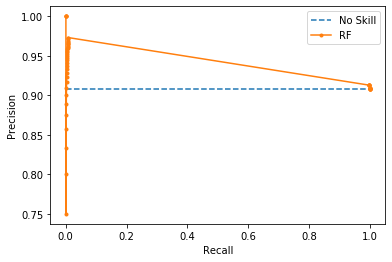

In [9]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.33, random_state=2, stratify=y)
# fit a model
model =  SVC( C = 1, gamma = 0.01, kernel = 'rbf',
            class_weight='balanced', # penalize
            probability=True)
 
model.fit(trainX, trainy)
model.fit(trainX, trainy)
# predict probabilities
lr_probs = model.predict_proba(testX)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# predict class values
yhat = model.predict(testX)
lr_precision, lr_recall, _ = precision_recall_curve(testy, lr_probs)
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(testy[testy==1]) / len(testy)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='RF')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

### One class SVM
Another technique for imbalanced classes is outlier detection.  Let's try one class svm classification where the model is trained with only the majortiy class.  this code is from machinelearningmastery.com

In [34]:
from sklearn.metrics import f1_score
from sklearn.svm import OneClassSVM

# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.33, random_state=2, stratify=y)
# define outlier detection model
model = OneClassSVM(gamma='scale', nu=0.091) # pick a nu that is proportional to outliers 
# fit on majority class  can also try with all samples 
trainX = trainX[trainy==1]
model.fit(trainX)
# detect outliers in the test set
yhat = model.predict(testX)
# mark inliers 1, outliers -1
testy[testy == 1] = 1
testy[testy == 0] = -1
# calculate score
score = f1_score(testy, yhat, pos_label=-1)
print('F1 Score: %.3f' % score)

F1 Score: 0.130


In [57]:
print(classification_report(testy, yhat))



              precision    recall  f1-score   support

          -1       0.13      0.13      0.13       397
           1       0.91      0.91      0.91      3890

    accuracy                           0.84      4287
   macro avg       0.52      0.52      0.52      4287
weighted avg       0.84      0.84      0.84      4287



In [52]:
confusion_matrix(testy, yhat)

array([[  51,  346],
       [ 337, 3553]], dtype=int64)

Results were only a 13% precision which is pretty low.

## try upsampling

In [6]:
X_imb =  data1.drop(columns=['Target']).values
y_imb = data1['Target'].values

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_imb, y_imb , test_size=0.3, random_state=42)



from sklearn.utils import resample

print('Number of class 0 samples before:', X_train[y_train == 0].shape[0])

X_upsampled, y_upsampled = resample(X_train[y_train == 0],
                                    y_train[y_train == 0],
                                    replace=True,
                                    n_samples=X_train[y_train == 1].shape[0],
                                    random_state=123)

print('Number of class 0 samples after:', X_upsampled.shape[0])

X_train = np.vstack((X_train[y_train == 1], X_upsampled))
y_train = np.hstack((y_train[y_train == 1], y_upsampled))



from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

Number of class 0 samples before: 847
Number of class 0 samples after: 8244


In [24]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [8]:
grid = GridSearchCV(SVC(),param_grid,scoring= 'f1', refit=True,verbose=1)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed: 71.9min finished


{'C': 1000, 'gamma': 1, 'kernel': 'rbf'}
0.8965687554221228


In [10]:
grid.best_estimator_
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[  97  258]
 [ 521 3021]]
              precision    recall  f1-score   support

           0       0.16      0.27      0.20       355
           1       0.92      0.85      0.89      3542

    accuracy                           0.80      3897
   macro avg       0.54      0.56      0.54      3897
weighted avg       0.85      0.80      0.82      3897



This is improved but not a great model. The f1 score is now 20 for prediction cancellations.

In [11]:
# show parameters for model with highest f1 score
print(grid.best_estimator_)

SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


### Learning Curve
using the upsampled model and f1 as scoring criteria.

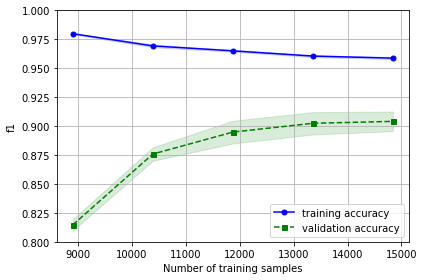

In [9]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 
                                            X_train,  y_train, cv=10, scoring='f1', n_jobs=-1, 
                                              train_sizes=np.linspace(0.1, 1.0, 10))


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)



plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('f1')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()



The curves are coming together which indicates more data and a larger trainin set maybe beneficial.  lets try with a smaller c value in order to regularize and reduce the overfittng and variance

In [20]:
model = SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [21]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test, predictions))

[[ 104  251]
 [ 698 2844]]
              precision    recall  f1-score   support

           0       0.13      0.29      0.18       355
           1       0.92      0.80      0.86      3542

    accuracy                           0.76      3897
   macro avg       0.52      0.55      0.52      3897
weighted avg       0.85      0.76      0.80      3897



This has produced more recall and lower precision which is expected with more regularization.

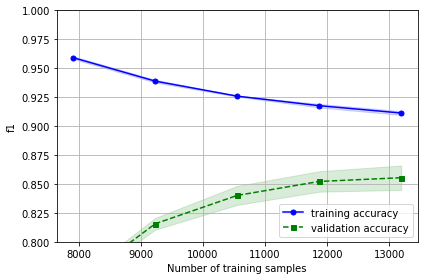

In [22]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=100, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 
                                            X_train,  y_train, cv=5, scoring='f1', n_jobs=-1, 
                                              train_sizes=np.linspace(0.1, 1.0, 10))


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('f1')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
# plt.savefig('./figures/learning_curve.png', dpi=300)
plt.show()




when we regularized it brought the curves closer together (less variance) but the curves are lower down on the y axis (more bias).  this is the classic tradeoff. A grid search with recall as the scoring criteria returned the same model as above.
Below is a learning curve to see how recall is affected by training size in the oversampled data set. It uses the best model above.

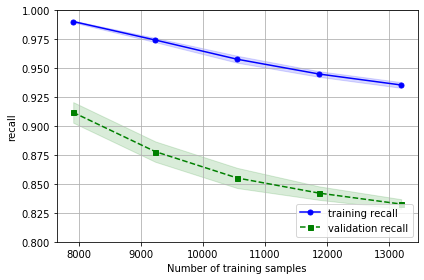

In [7]:
train_sizes, train_scores, test_scores = learning_curve(SVC(C=1000, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False), 
                                            X_train,  y_train, cv=5, scoring='recall', n_jobs=-1, 
                                              train_sizes=np.linspace(0.1, 1.0, 10))


train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training recall')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation recall')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('recall')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()
plt.show()


### Conclusion
Recall does not improve with the increase of the training size.  Keep in mind the recall calculated here includes both positive and negative predictions.